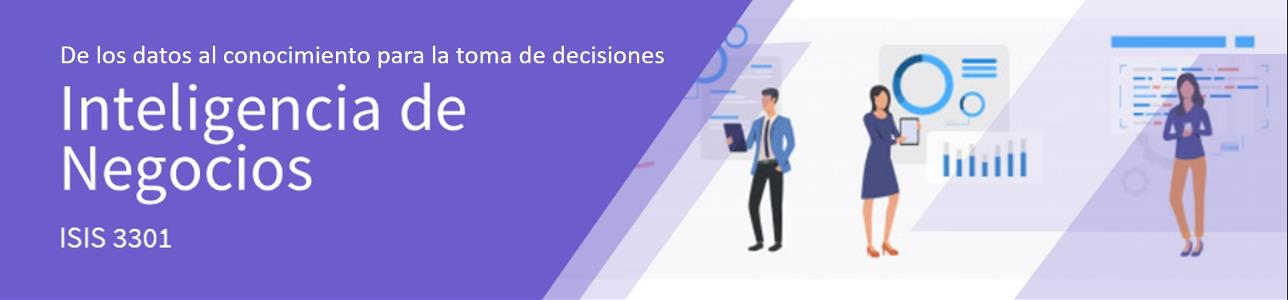

# Proyecto 1 BI - Análitica de Textos según ODS

- **Estudiante 1:** Evelin Vanessa Villamil Guerrero, e.villamilg, 202113360
- **Estudiante 2:** Carlos German Monroy Andrade, cg.monroy, 201728260

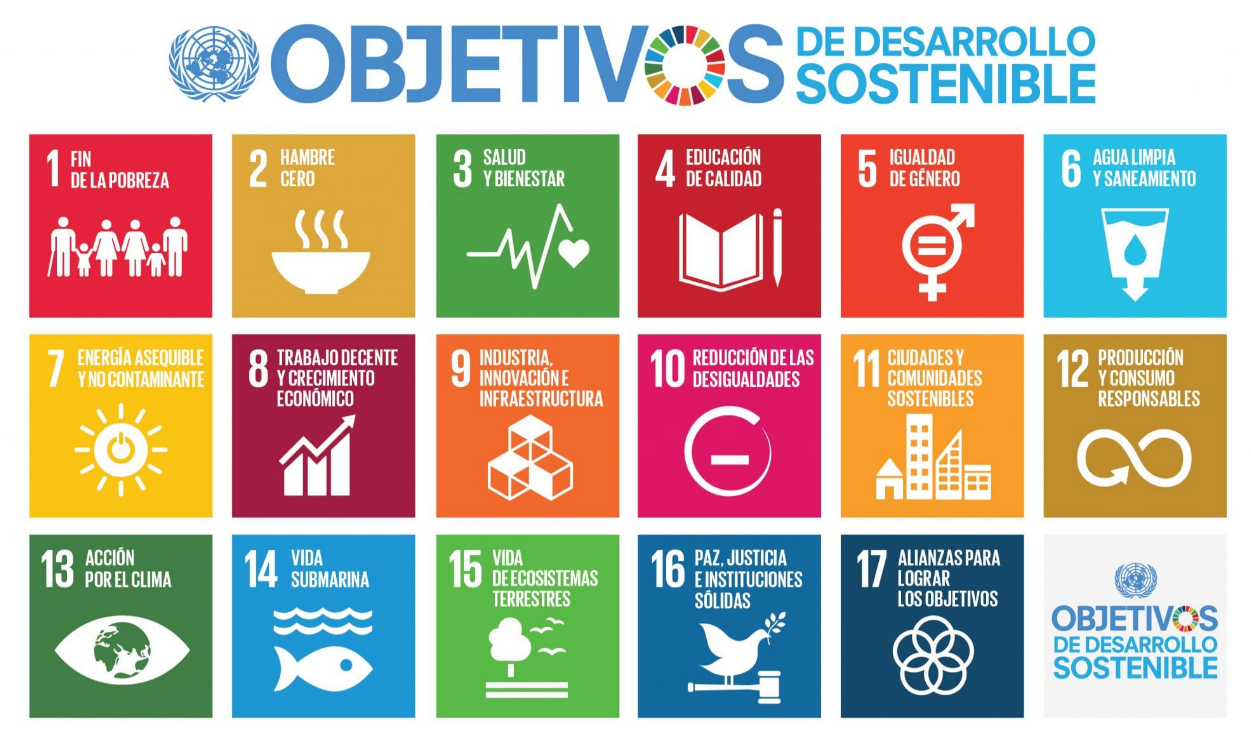

En este caso vamos a abordar los siguientes objetivos:

- (6) Agua limpia y saneamiento
- (7) Energía asequible y no contaminante
- (16) Paz, justicia e instituciones sólidas

## Etapa 1

## Objetivos

*   Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos del negocio en un contexto de aplicación.
*   Planear la interacción con un grupo interdisciplinario para identificar usuarios y posibles herramientas a desarrollar para la interacción del resultado del modelo desarrollado.

## Problema
<p style="text-align: justify;"> Desarrollar un modelo de clasificación, con técnicas de aprendizaje automático, que permita relacionar de manera automática un texto según los ODS. Al igual que desarrollar una aplicación que facilite la interacción con el resultado de dicho modelo. El modelo podrá ser utilizado entonces para la interpretación y análisis de la información textual que es recopilada a través de diferentes fuentes por UNFPA en procesos de planeación participativa para el desarrollo a nivel territorial.


# 1. Instalación e importanción de librerías.

In [1]:
# Silenciar recomendaciones y advertencias
import nltk
import pandas as pd

# Desactivar advertencias de descarga
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
pd.options.mode.chained_assignment = None 

In [2]:
!pip install ftfy

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install unidecode

In [5]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

In [6]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Evelin
[nltk_data]     Villamil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Evelin
[nltk_data]     Villamil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [108]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport
from unidecode import unidecode

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
nltk.download('wordnet')


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from nltk.tokenize import word_tokenize
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to C:\Users\Evelin
[nltk_data]     Villamil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Configuring pandas to show all cell content
pd.set_option("display.max_colwidth", None)

Obtener la lista de stopwords en español que sera utilizada para eliminar palabras comunes, ya que no aportan información relevante al procesamiento de lenguaje natural

In [10]:
# Downloading stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to C:\Users\Evelin
[nltk_data]     Villamil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Evelin
[nltk_data]     Villamil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

# 2. Perfilamiento y entendimiento de los datos


Leer el csv con los datos

In [12]:
# Uso de la libreria pandas para la lectura de archivos excel
df = pd.read_excel('./data/cat_6716.xlsx')
# Asignación a una nueva variable de los datos leidos
data_t=df

In [13]:
data_t.shape

(3000, 2)

In [14]:
data_t.sample(5)

,Textos_espanol,sdg
1465,Y Cyberjaya está utilizando la refrigeración urbana para reducir y desplazar la demanda de electricidad mediante el uso de enfriadoras de alta eficiencia con almacenamiento de hielo y agua fría. La energía urbana es la única forma de utilizar calor residual de baja energía y grado o fuentes de refrigeración gratuitas para estos usos finales en los edificios. Port Louis bombeará agua desde 1.000 metros bajo el nivel del mar para suministrar agua fría a un nuevo sistema de refrigeración urbana que sustituirá al aire acondicionado descentralizado alimentado con electricidad procedente de combustibles fósiles.,7
572,"Las Partes están obligadas a establecer sistemas de alerta rápida, aplicar e intercambiar la mejor tecnología disponible y prestarse asistencia mutua. Por último, las Partes pondrán a disposición del público información sobre el estado medioambiental de las aguas transfronterizas, los escenarios previstos y los objetivos de calidad del agua. Así pues, la correcta aplicación del Convenio proporciona una buena base para la ejecución de estos instrumentos subregionales, incluida la labor de adaptación (véanse los recuadros 4 y 5 sobre el Rin y el Danubio). Las actividades relativas a la adaptación al cambio climático han comenzado con una evaluación del estado de los conocimientos sobre el cambio climático y su impacto previsto en el régimen hídrico del Rin, publicada en 2009. Sin embargo, ya en la dÃ©cada de los noventa se adoptaron importantes medidas en materia de gestiÃ³n del riesgo de inundaciones, aumentando la capacidad de adaptaciÃ³n de la cuenca para responder a los futuros cambios climÃ¡ticos previstos. En el contexto de la aplicación del Plan de Acción contra las Inundaciones de 1998, se ha evaluado el riesgo de daños por inundaciones (definido como el producto del potencial de daños (â'¬) y la probabilidad de inundación (por año).",6
1236,Las importaciones de combustibles representaron el 6 por ciento del PIB y el 14 por ciento de las importaciones de mercancías en 2014. El sector del transporte y el sector de la electricidad son los mayores usuarios de combustibles fósiles (Figura 9.3). Se están mejorando las carreteras y Port Vila tiene un servicio de minibús único que sirve como el principal sistema de transporte público.,7
2000,"El Reglamento Sanitario Internacional (RSI) sigue siendo el principal tratado jurídico internacional centrado específicamente en el control de las enfermedades infecciosas. A mediados de la década de 1990, los responsables de la salud pública internacional reconocieron la necesidad de revisar el RSI para adaptarlo mejor al mundo moderno. Al revisar el RSI, el tratado ampliÃ³ enormemente el alcance de las afecciones notificables, reforzÃ³ y ampliÃ³ los requisitos de notificaciÃ³n e intentÃ³ incorporar explÃcitamente consideraciones de derechos humanos, todo ello en aras de reducir los riesgos transfronterizos asociados a las enfermedades infecciosas. En este artÃculo, recorro el desarrollo del RSI como herramienta para mitigar el riesgo de enfermedades infecciosas y examino en quÃ© medida la versiÃ³n revisada del RSI responde a las preocupaciones contemporÃ¡neas en materia de enfermedades infecciosas. En particular, me centro en cómo el RSI ha ampliado los requisitos de vigilancia al tiempo que reconoce la necesidad de respetar los derechos humanos internacionales.",16
2673,"La implementación del Estatuto de Roma en América Latina continúa enfrentando brechas estructurales causadas por la falta de implementación integral de todos los elementos del tratado. En el caso de la legislación sobre crímenes de guerra, solo siete países han adoptado normas específicas que implementan el artículo 8 del Estatuto de Roma o violaciones graves del derecho internacional humanitario. El principal problema persiste en el hecho de que no ha habido una implementación significativa del Protocolo adicional 1 a los Convenios de Ginebra de 1949 como complemento del artículo 8 del

Se procede a identificar en qué idiomas se encuentran los textos (las cuales deberían estar todas en español). Para esto, se agrega de manera momentánea una columna que indica el idioma de la reseña.

In [15]:
from langdetect import detect
data_t['idioma'] = data_t['Textos_espanol'].apply(detect)

Se puede apreciar que hay un pequeño porcentaje de textos que se encuentran en inglés, estas serán eliminadas, ya que la cantidad es insignificante.

In [16]:
data_t['idioma'].value_counts(dropna = False, normalize = True)

es    0.999
en    0.001
Name: idioma, dtype: float64

Se puede apreciar que hasta el momento (antes de la limpieza de los datos) no hay valores nulos en el df.

In [17]:
(data_t.isnull().sum() / data_t.shape[0]).sort_values(ascending = False)

Textos_espanol    0.0
sdg               0.0
idioma            0.0
dtype: float64

También, se verifica que no haya valores duplicados en el df:

In [18]:
duplicates = data_t.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  0


## 2.1 Limpieza de datos

Se eliminan los textos en inglés:

In [19]:
data_t = data_t.drop(data_t[data_t['idioma'] == 'en'].index)

Se elimina la columna 'idioma' dado a que esta no se utilizará más adelante:

In [20]:
# Eliminar la columna 'idioma'
data_t = data_t.drop('idioma', axis=1)

##### Distribución de valores en la columna "sdg" 

In [21]:
data_t["sdg"].value_counts(dropna=False, normalize=True)

6     0.333667
16    0.333667
7     0.332666
Name: sdg, dtype: float64

Se puede ver una distribución equitativa de los datos en los tres objetivos

In [22]:
data_t["Textos_espanol"] = data_t["Textos_espanol"].astype(str)

### Corrección de palabras mal codificadas

In [23]:
import ftfy

def fix_malformed_words(text):
    # Se corrigen problemas de codificación
    text = ftfy.fix_text(text)
    return text

# Se aplica la función al DataFrame
data_t['Textos_espanol'] = data_t['Textos_espanol'].apply(fix_malformed_words)

In [24]:
#Se verifica que se haya realizado la corrección
data_t.head(5)

,Textos_espanol,sdg
0,"Es importante destacar que, en un año de sequía, se espera que disminuyan todos los aportes, pero que aumente la demanda de agua de los cultivos y de la vegetación, lo que provocará una reducción del caudal de los ríos que están conectados hidrológicamente con el acuífero, así como una menor disponibilidad de agua para otros ecosistemas dependientes de las aguas subterráneas. Estas externalidades espaciales pueden incluir el agotamiento de los cursos de agua y el descenso del nivel freático local. Por ejemplo, el bombeo continuo del pozo B provocará el agotamiento de los cursos de agua y la reducción de su caudal.",6
1,"Hay una gran cantidad de literatura sobre Australia en esta área que sugiere fuertemente que el comercio de agua, especialmente en los mercados a corto plazo, no solo permite mitigar sustancialmente los impactos de las sequías en la agricultura, sino que ahora los agricultores lo consideran como un medio útil y básico. instrumento en su caja de herramientas de gestión de riesgos. Los desafíos políticos para Australia en el área de la regulación del agua en la agricultura están más en las áreas de cómo ajustar el sistema existente y los problemas de solidez relacionados con el cambio climático. Si bien el ejemplo australiano ilustra las posibles ganancias de eficiencia que surgen del comercio de agua, especialmente para gestionar la escasez de agua en circunstancias de sequía, la elección de un instrumento siempre debe considerar la gama completa de costos y beneficios.",6
2,"Los procesos de descentralización, emprendidos para una serie de actividades que antes realizaba el gobierno central, llevaron a modificaciones importantes en la forma en que se administraba y operaba el sector del agua. Las únicas excepciones a esta tendencia fueron Azerbaiyán, Bielorrusia y Turkmenistán, donde la gestión del sector del agua ha permanecido fuertemente centralizada. En Azerbaiyán, por ejemplo, la empresa nacional AZERSU JSC suministra agua al 65 % de la población, con un 10 % proporcionado por pequeños operadores privados y un 25 % por los propios hogares.",6
3,"Esto puede tener consecuencias sustanciales para la calidad del agua, especialmente en el río Mississippi y el norte del Golfo de México (De la Torre Ugarte et al., Si se requieren aportes de nutrientes para las plantaciones de madera, la infiltración y la escorrentía de nitrógeno también pueden representar un riesgo para las aguas subterráneas). (Lattimore et al., otra conclusión importante es que la ubicación de la producción y el tipo de producción de labranza, el sistema de rotación de cultivos y otras prácticas de gestión agrícola utilizadas en la producción de materias primas para la producción de bioenergía también influirán en gran medida en la calidad del agua (De la Torre Ugarte et al. ,",6
4,"La función de beneficio también incorpora parámetros que afectan a todos los usuarios, como los precios de insumos y productos y el clima.7 Por ejemplo, en un año seco, se espera que el beneficio de aplicar cualquier cantidad de agua a un cultivo sea mayor que en un año seco. año húmedo. La optimización óptima requeriría una valoración explícita de todos los posibles servicios ambientales asociados con el recurso de agua subterránea, tanto ahora como en el futuro. En cambio, la sociedad decide el nivel de servicios hidrológicos que es deseable y el problema económico es lograr ese nivel utilizando una solución que maximice los beneficios para los usuarios del agua.",6


### Eliminación de caracteres especiales y puntuación

In [25]:
import re
import unicodedata
import inflect
from nltk.corpus import stopwords

# Se utiliza la lista de stop words en español obtenida anteriormente
stopwords_espanol = set(stopwords.words('spanish'))

def remover_no_ascii(palabras):
    # Eliminar caracteres no ASCII 
    nuevas_palabras = []
    for palabra in palabras:
        nueva_palabra = unicodedata.normalize('NFKD', palabra).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        nuevas_palabras.append(nueva_palabra)
    return nuevas_palabras

def a_minusculas(palabras):
    # Convertir todos los caracteres a minúsculas 
    nuevas_palabras = []
    for palabra in palabras:
        nuevas_palabras.append(palabra.lower())
    return nuevas_palabras

def remover_puntuacion(palabras):
    # Eliminar la puntuación 
    nuevas_palabras = []
    for palabra in palabras:
        nueva_palabra = re.sub(r'[^\w\s]', '', palabra)
        if nueva_palabra != '':
            nuevas_palabras.append(nueva_palabra)
    return nuevas_palabras

def reemplazar_numeros(palabras):
    # Reemplazar todas las ocurrencias de números enteros con su representación textual
    p = inflect.engine()
    nuevas_palabras = []
    for palabra in palabras:
        if palabra.isdigit():
            nueva_palabra = p.number_to_words(palabra)
            nuevas_palabras.append(nueva_palabra)
        else:
            nuevas_palabras.append(palabra)
    return nuevas_palabras

def remover_stopwords(palabras):
    # Eliminar las stop words
    nuevas_palabras = []
    for palabra in palabras:
        if palabra not in stopwords_espanol:
            nuevas_palabras.append(palabra)
    return nuevas_palabras

def preprocesamiento(palabras):
    palabras = a_minusculas(palabras)
    palabras = reemplazar_numeros(palabras)
    palabras = remover_puntuacion(palabras)
    palabras = remover_no_ascii(palabras)
    palabras = remover_stopwords(palabras)
    return palabras

### Tokenización

In [26]:
# Corregir las contracciones
data_t['Textos_espanol'] = data_t['Textos_espanol'].apply(contractions.fix)

In [27]:
# Eliminación del ruido
data_t['words'] = data_t['Textos_espanol'].apply(word_tokenize).apply(preprocesamiento)
data_t.head()

,Textos_espanol,sdg,words
0,"Es importante destacar que, en un año de sequía, se espera que disminuyan todos los aportes, pero que aumente la demanda de agua de los cultivos y de la vegetación, lo que provocará una reducción del caudal de los ríos que están conectados hidrológicamente con el acuífero, así como una menor disponibilidad de agua para otros ecosistemas dependientes de las aguas subterráneas. Estas externalidades espaciales pueden incluir el agotamiento de los cursos de agua y el descenso del nivel freático local. Por ejemplo, el bombeo continuo del pozo B provocará el agotamiento de los cursos de agua y la reducción de su caudal.",6,"[importante, destacar, ano, sequia, espera, disminuyan, aportes, aumente, demanda, agua, cultivos, vegetacion, provocara, reduccion, caudal, rios, estan, conectados, hidrologicamente, acuifero, asi, menor, disponibilidad, agua, ecosistemas, dependientes, aguas, subterraneas, externalidades, espaciales, pueden, incluir, agotamiento, cursos, agua, descenso, nivel, freatico, local, ejemplo, bombeo, continuo, pozo, b, provocara, agotamiento, cursos, agua, reduccion, caudal]"
1,"Hay una gran cantidad de literatura sobre Australia en esta área que sugiere fuertemente que el comercio de agua, especialmente en los mercados a corto plazo, no solo permite mitigar sustancialmente los impactos de las sequías en la agricultura, sino que ahora los agricultores lo consideran como un medio útil y básico. instrumento en su caja de herramientas de gestión de riesgos. Los desafíos políticos para Australia en el área de la regulación del agua en la agricultura están más en las áreas de cómo ajustar el sistema existente y los problemas de solidez relacionados con el cambio climático. Si bien el ejemplo australiano ilustra las posibles ganancias de eficiencia que surgen del comercio de agua, especialmente para gestionar la escasez de agua en circunstancias de sequía, la elección de un instrumento siempre debe considerar la gama completa de costos y beneficios.",6,"[gran, cantidad, literatura, australia, area, sugiere, fuertemente, comercio, agua, especialmente, mercados, corto, plazo, solo, permite, mitigar, sustancialmente, impactos, sequias, agricultura, sino, ahora, agricultores, consideran, medio, util, basico, instrumento, caja, herramientas, gestion, riesgos, desafios, politicos, australia, area, regulacion, agua, agricultura, estan, mas, areas, ajustar, sistema, existente, problemas, solidez, relacionados, cambio, climatico, si, bien, ejemplo, australiano, ilustra, posibles, ganancias, eficiencia, surgen, comercio, agua, especialmente, gestionar, escasez, agua, circunstancias, sequia, eleccion, instrumento, siempre, debe, considerar, gama, completa, costos, beneficios]"
2,"Los procesos de descentralización, emprendidos para una serie de actividades que antes realizaba el gobierno central, llevaron a modificaciones importantes en la forma en que se administraba y operaba el sector del agua. Las únicas excepciones a esta tendencia fueron Azerbaiyán, Bielorrusia y Turkmenistán, donde la gestión del sector del agua ha permanecido fuertemente centralizada. En Azerbaiyán, por ejemplo, la empresa nacional AZERSU JSC suministra agua al 65 % de la población, con un 10 % proporcionado por pequeños operadores privados y un 25 % por los propios hogares.",6,"[procesos, descentralizacion, emprendidos, serie, actividades, realizaba, gobierno, central, llevaron, modificaciones, importantes, forma, administraba, operaba, sector, agua, unicas, excepciones, tendencia, azerbaiyan, bielorrusia, turkmenistan, gestion, sector, agua, permanecido, fuertemente, centralizada, azerbaiyan, ejemplo, empresa, nacional, azersu, jsc, suministra, agua, sixtyfive, poblacion, ten, proporcionado, pequenos, operadores, privados, twentyfive, propios, hogares]"
3,"Esto puede tener consecuencias sustanciales para la calidad del agua, especialmente en el río Mississippi y el norte del Golfo de México (De la Torre Ugarte et al., Si se requie

### Normalización de texto

In [28]:
# Crear instancias de los stemmers y lematizadores
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

def obtener_raices(palabras):
    # Obtener raíces de las palabras
    raices = [stemmer.stem(palabra) for palabra in palabras]
    return raices

def lematizar_verbos(palabras):
    # Lematizar los verbos
    lemas = []
    for palabra in palabras:
        pos = obtener_pos_wordnet(palabra)
        if pos:
            lema = lemmatizer.lemmatize(palabra, pos)
            lemas.append(lema)
        else:
            lemas.append(palabra)
    return lemas

def raices_y_lemas(palabras):
    raices = obtener_raices(palabras)
    lemas = lematizar_verbos(raices)
    return lemas

def obtener_pos_wordnet(palabra):
    # Mapear la etiqueta de parte de la oración a la primera letra aceptada por WordNetLemmatizer
    etiqueta = nltk.pos_tag([palabra])[0][1][0].upper()
    diccionario_pos = {"J": wordnet.ADJ,
                       "N": wordnet.NOUN,
                       "V": wordnet.VERB,
                       "R": wordnet.ADV}
    return diccionario_pos.get(etiqueta, wordnet.NOUN)

In [29]:
#Se verifica que se haya realizado la corrección
data_t.head(5)

,Textos_espanol,sdg,words
0,"Es importante destacar que, en un año de sequía, se espera que disminuyan todos los aportes, pero que aumente la demanda de agua de los cultivos y de la vegetación, lo que provocará una reducción del caudal de los ríos que están conectados hidrológicamente con el acuífero, así como una menor disponibilidad de agua para otros ecosistemas dependientes de las aguas subterráneas. Estas externalidades espaciales pueden incluir el agotamiento de los cursos de agua y el descenso del nivel freático local. Por ejemplo, el bombeo continuo del pozo B provocará el agotamiento de los cursos de agua y la reducción de su caudal.",6,"[importante, destacar, ano, sequia, espera, disminuyan, aportes, aumente, demanda, agua, cultivos, vegetacion, provocara, reduccion, caudal, rios, estan, conectados, hidrologicamente, acuifero, asi, menor, disponibilidad, agua, ecosistemas, dependientes, aguas, subterraneas, externalidades, espaciales, pueden, incluir, agotamiento, cursos, agua, descenso, nivel, freatico, local, ejemplo, bombeo, continuo, pozo, b, provocara, agotamiento, cursos, agua, reduccion, caudal]"
1,"Hay una gran cantidad de literatura sobre Australia en esta área que sugiere fuertemente que el comercio de agua, especialmente en los mercados a corto plazo, no solo permite mitigar sustancialmente los impactos de las sequías en la agricultura, sino que ahora los agricultores lo consideran como un medio útil y básico. instrumento en su caja de herramientas de gestión de riesgos. Los desafíos políticos para Australia en el área de la regulación del agua en la agricultura están más en las áreas de cómo ajustar el sistema existente y los problemas de solidez relacionados con el cambio climático. Si bien el ejemplo australiano ilustra las posibles ganancias de eficiencia que surgen del comercio de agua, especialmente para gestionar la escasez de agua en circunstancias de sequía, la elección de un instrumento siempre debe considerar la gama completa de costos y beneficios.",6,"[gran, cantidad, literatura, australia, area, sugiere, fuertemente, comercio, agua, especialmente, mercados, corto, plazo, solo, permite, mitigar, sustancialmente, impactos, sequias, agricultura, sino, ahora, agricultores, consideran, medio, util, basico, instrumento, caja, herramientas, gestion, riesgos, desafios, politicos, australia, area, regulacion, agua, agricultura, estan, mas, areas, ajustar, sistema, existente, problemas, solidez, relacionados, cambio, climatico, si, bien, ejemplo, australiano, ilustra, posibles, ganancias, eficiencia, surgen, comercio, agua, especialmente, gestionar, escasez, agua, circunstancias, sequia, eleccion, instrumento, siempre, debe, considerar, gama, completa, costos, beneficios]"
2,"Los procesos de descentralización, emprendidos para una serie de actividades que antes realizaba el gobierno central, llevaron a modificaciones importantes en la forma en que se administraba y operaba el sector del agua. Las únicas excepciones a esta tendencia fueron Azerbaiyán, Bielorrusia y Turkmenistán, donde la gestión del sector del agua ha permanecido fuertemente centralizada. En Azerbaiyán, por ejemplo, la empresa nacional AZERSU JSC suministra agua al 65 % de la población, con un 10 % proporcionado por pequeños operadores privados y un 25 % por los propios hogares.",6,"[procesos, descentralizacion, emprendidos, serie, actividades, realizaba, gobierno, central, llevaron, modificaciones, importantes, forma, administraba, operaba, sector, agua, unicas, excepciones, tendencia, azerbaiyan, bielorrusia, turkmenistan, gestion, sector, agua, permanecido, fuertemente, centralizada, azerbaiyan, ejemplo, empresa, nacional, azersu, jsc, suministra, agua, sixtyfive, poblacion, ten, proporcionado, pequenos, operadores, privados, twentyfive, propios, hogares]"
3,"Esto puede tener consecuencias sustanciales para la calidad del agua, especialmente en el río Mississippi y el norte del Golfo de México (De la Torre Ugarte et al., Si se requie

Convertir la columna 'words', que contiene listas de elementos, en una sola cadena de texto donde los elementos de la lista están separados por espacios en blanco

In [30]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

,Textos_espanol,sdg,words
0,"Es importante destacar que, en un año de sequía, se espera que disminuyan todos los aportes, pero que aumente la demanda de agua de los cultivos y de la vegetación, lo que provocará una reducción del caudal de los ríos que están conectados hidrológicamente con el acuífero, así como una menor disponibilidad de agua para otros ecosistemas dependientes de las aguas subterráneas. Estas externalidades espaciales pueden incluir el agotamiento de los cursos de agua y el descenso del nivel freático local. Por ejemplo, el bombeo continuo del pozo B provocará el agotamiento de los cursos de agua y la reducción de su caudal.",6,importante destacar ano sequia espera disminuyan aportes aumente demanda agua cultivos vegetacion provocara reduccion caudal rios estan conectados hidrologicamente acuifero asi menor disponibilidad agua ecosistemas dependientes aguas subterraneas externalidades espaciales pueden incluir agotamiento cursos agua descenso nivel freatico local ejemplo bombeo continuo pozo b provocara agotamiento cursos agua reduccion caudal
1,"Hay una gran cantidad de literatura sobre Australia en esta área que sugiere fuertemente que el comercio de agua, especialmente en los mercados a corto plazo, no solo permite mitigar sustancialmente los impactos de las sequías en la agricultura, sino que ahora los agricultores lo consideran como un medio útil y básico. instrumento en su caja de herramientas de gestión de riesgos. Los desafíos políticos para Australia en el área de la regulación del agua en la agricultura están más en las áreas de cómo ajustar el sistema existente y los problemas de solidez relacionados con el cambio climático. Si bien el ejemplo australiano ilustra las posibles ganancias de eficiencia que surgen del comercio de agua, especialmente para gestionar la escasez de agua en circunstancias de sequía, la elección de un instrumento siempre debe considerar la gama completa de costos y beneficios.",6,gran cantidad literatura australia area sugiere fuertemente comercio agua especialmente mercados corto plazo solo permite mitigar sustancialmente impactos sequias agricultura sino ahora agricultores consideran medio util basico instrumento caja herramientas gestion riesgos desafios politicos australia area regulacion agua agricultura estan mas areas ajustar sistema existente problemas solidez relacionados cambio climatico si bien ejemplo australiano ilustra posibles ganancias eficiencia surgen comercio agua especialmente gestionar escasez agua circunstancias sequia eleccion instrumento siempre debe considerar gama completa costos beneficios
2,"Los procesos de descentralización, emprendidos para una serie de actividades que antes realizaba el gobierno central, llevaron a modificaciones importantes en la forma en que se administraba y operaba el sector del agua. Las únicas excepciones a esta tendencia fueron Azerbaiyán, Bielorrusia y Turkmenistán, donde la gestión del sector del agua ha permanecido fuertemente centralizada. En Azerbaiyán, por ejemplo, la empresa nacional AZERSU JSC suministra agua al 65 % de la población, con un 10 % proporcionado por pequeños operadores privados y un 25 % por los propios hogares.",6,procesos descentralizacion emprendidos serie actividades realizaba gobierno central llevaron modificaciones importantes forma administraba operaba sector agua unicas excepciones tendencia azerbaiyan bielorrusia turkmenistan gestion sector agua permanecido fuertemente centralizada azerbaiyan ejemplo empresa nacional azersu jsc suministra agua sixtyfive poblacion ten proporcionado pequenos operadores privados twentyfive propios hogares
3,"Esto puede tener consecuencias sustanciales para la calidad del agua, especialmente en el río Mississippi y el norte del Golfo de México (De la Torre Ugarte et al., Si se requieren aportes de nutrientes para las plantaciones de madera, la infiltración y la escorrentía de nitrógeno también pueden representar un riesgo para las aguas subterráneas). (Lattimor

Guardar el nuevo DataFrame en un archivo csv

In [176]:
nuevo_df = data_t[['Textos_espanol','words', 'sdg']]
nuevo_df.to_csv('clean_cat_6716.csv', index=False)

# 3. Modelado y evaluación

## 3.1. Random Forest (Evelin Villamil)

Random Forest es un algoritmo de aprendizaje supervisado que se utiliza tanto para la clasificación como para la regresión. Este algoritmo se basa en la combinación de múltiples árboles de decisión, donde cada árbol se entrena con una submuestra aleatoria del conjunto de datos de entrenamiento. Durante la predicción, el algoritmo promedia las predicciones de todos los árboles de decisión para obtener la salida final.

Random Forest se puede utilizar en la clasificación de un texto según los ODS porque es capaz de manejar múltiples características de texto (como BoW, TF-IDF y HashingVectorizer) al mismo tiempo, lo que puede mejorar el rendimiento en la clasificación. Además, al combinar múltiples árboles de decisión, Random Forest reduce el riesgo de sobreajuste y mejora la generalización del modelo a nuevos datos. En resumen, Random Forest puede ser útil para entrenar modelos de clasificación de texto según los ODS porque puede manejar múltiples características de texto, reduce el riesgo de sobreajuste y mejora la generalización del modelo a nuevos datos.

In [32]:
from sklearn.ensemble import RandomForestClassifier

## Entrenamiento del modelo con TF_IDF

## División de datos

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_t[["words"]], data_t["sdg"], random_state=1, stratify=data_t['sdg'])

In [34]:
X_train.shape, X_test.shape

((2247, 1), (750, 1))

In [35]:
y_train.shape, y_test.shape

((2247,), (750,))

In [36]:
#ver los primeros datos de entrenamiento
y_train[:5]

1683     7
2414    16
1552     7
2597    16
1566     7
Name: sdg, dtype: int64

Se verifica que se mentenga una distribución de datos similar a la original:

In [37]:
pd.Series(y_train).value_counts(normalize=True)

16    0.333778
6     0.333778
7     0.332443
Name: sdg, dtype: float64

In [38]:
pd.Series(y_test).value_counts(normalize=True)

16    0.333333
7     0.333333
6     0.333333
Name: sdg, dtype: float64

## Vectorización del texto

En este código se está utilizando el TfidfVectorizer para crear una matriz de términos de frecuencia inversa de documentos (TF-IDF) a partir del conjunto de datos de entrenamiento (X_train). La finalidad de utilizar TF-IDF es dar más peso a las palabras que son importantes para el documento, lo que ayuda a mejorar la calidad de las predicciones.

In [39]:
texts = X_train['words']

# Crea una instancia de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,  
                                   stop_words= stop_words, 
                                   lowercase=True)

# Ajusta y transforma los datos de texto
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# tfidf_matrix es una matriz que contiene las representaciones TF-IDF de tus textos

print(X_tfidf.shape)
print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))

C:\Users\Evelin Villamil\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(2247, 17941)
Vocabulary size: 17941


En este código se está entrenando un modelo de clasificación de bosque aleatorio (Random Forest) usando el método de vectorización Tfidf.

In [40]:
tfidf_model_best = RandomForestClassifier(random_state=3)

In [41]:
print("Shape de X_tfidf:", X_tfidf.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)
print("Ejemplos de y_train:", y_train[:10])  # Imprime las primeras 10 etiquetas
print("Ejemplos de y_test:", y_test[:10])    # Imprime las primeras 10 etiquetas

Shape de X_tfidf: (2247, 17941)
Shape de y_train: (2247,)
Shape de y_test: (750,)
Ejemplos de y_train: 1683     7
2414    16
1552     7
2597    16
1566     7
2991    16
1922     7
2282    16
220      6
672      6
Name: sdg, dtype: int64
Ejemplos de y_test: 2087    16
1494     7
2670    16
2261    16
1041     7
264      6
219      6
1827     7
1977     7
2406    16
Name: sdg, dtype: int64


In [42]:
tfidf_model_best.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

Luego, se está graficando un gráfico de barras horizontal para mostrar la importancia de cada característica en la predicción del modelo.

<Axes: >

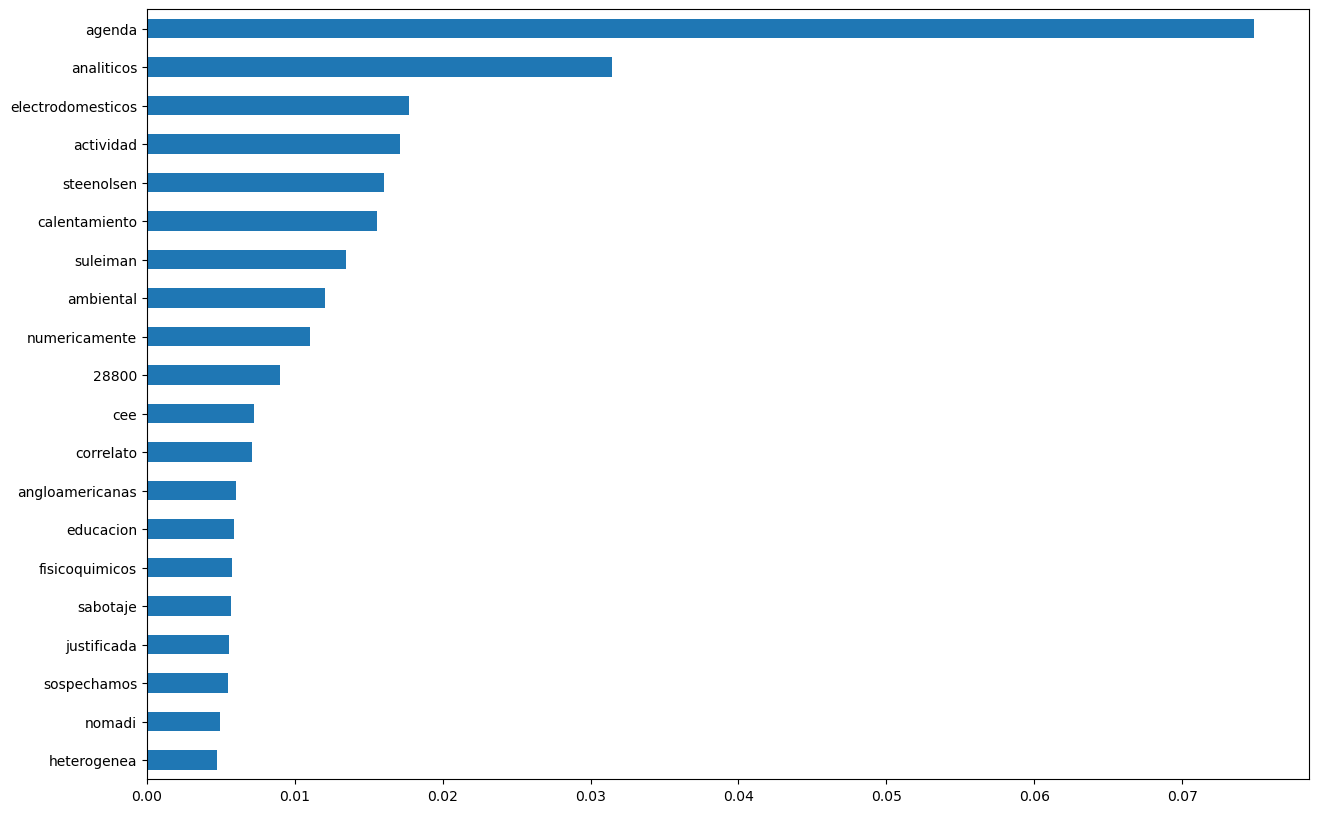

In [43]:
pd.Series(tfidf_model_best.feature_importances_, index=tfidf_vectorizer.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

A continuación, se muestra la cantidad de árboles en el modelo y la profundidad promedio de los árboles en el modelo. Finalmente, se hace una predicción en los datos de entrenamiento y en los datos de prueba. El propósito de esto es evaluar el rendimiento del modelo y su capacidad para generalizar en datos nuevos.

In [44]:
tfidf_estimators = tfidf_model_best.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 90.2


In [45]:
# predicciones en función de las características de entrenamiento vectorizadas
y_train_tfidf_predict = tfidf_model_best.predict(X_tfidf)
# predicciones en función de las características de prueba vectorizadas en X_test["words"]
y_test_tfidf_predict = tfidf_model_best.predict(tfidf_vectorizer.transform(X_test["words"]))

## Validación cuantitativa

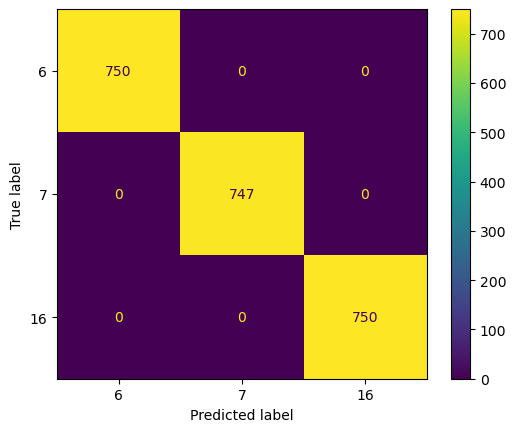

In [46]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

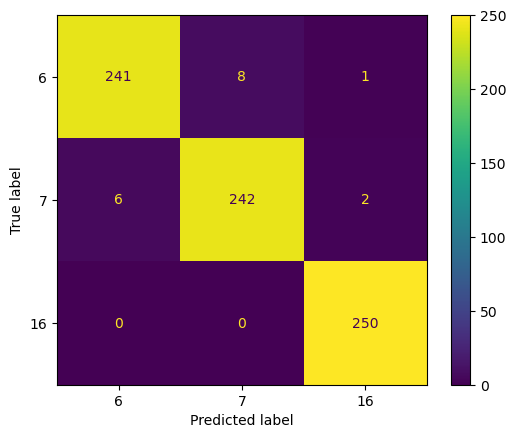

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

## Métricas para del data frame de entrenamiento

Estos resultados indican que el modelo de clasificación de Random Forest basado en TF-IDF logró clasificar correctamente todos los casos en el conjunto de entrenamiento. La precisión, recall y F1-score son todas iguales a 1. Esto implica que el modelo es muy preciso en predecir la clase correcta y no hay falsos positivos ni falsos negativos.

In [48]:
print("Precision (micro):", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_train, y_train_tfidf_predict, average='micro'))


Precision (micro): 1.0
Recall (micro): 1.0
F1 (micro): 1.0


In [49]:
print("Precision (macro):", precision_score(y_train, y_train_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_train, y_train_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_train, y_train_tfidf_predict, average='macro'))


Precision (macro): 1.0
Recall (macro): 1.0
F1 (macro): 1.0


In [50]:
print("Precision (weighted):", precision_score(y_train, y_train_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_train, y_train_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_train, y_train_tfidf_predict, average='weighted'))


Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


## Métricas para de data frame de prueba

Estos resultados corresponden a la evaluación del modelo de clasificación basado en TF-IDF en el conjunto de prueba. La precisión, recall y F1-score obtenidos son 0.97, 0.97 y 0.97, respectivamente. La precisión indica la proporción de verdaderos positivos entre los ejemplos clasificados como positivos, mientras que el recall mide la proporción de verdaderos positivos que han sido correctamente identificados por el modelo. El F1-score es una medida que combina la precisión y el recall para obtener una medida general de la calidad de la clasificación.

En este caso, los resultados indican que el modelo tiene una buena precisión y recall, lo que sugiere que es capaz de identificar correctamente la mayoría de los textos según ODS en el conjunto de prueba.

In [51]:
print("Precision (micro):", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision (micro): 0.9773333333333334
Recall (micro): 0.9773333333333334
F1 (micro): 0.9773333333333334


In [52]:
print("Precision (macro):", precision_score(y_test, y_test_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_test, y_test_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_test, y_test_tfidf_predict, average='macro'))

Precision (macro): 0.97728359817147
Recall (macro): 0.9773333333333333
F1 (macro): 0.9772848995897184


In [53]:
print("Precision (weighted):", precision_score(y_test, y_test_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_test_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_test, y_test_tfidf_predict, average='weighted'))

Precision (weighted): 0.97728359817147
Recall (weighted): 0.9773333333333334
F1 (weighted): 0.9772848995897185


## Validación cruzada

El valor obtenido en la validación cruzada de 0.980 indica que el modelo de clasificación de texto usando TF-IDF como representación de características tiene un buen desempeño en términos de la precisión general en la predicción de las clases.

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
# Validación cruzada con 5 iteraciones (cv=5)
cv_scores = cross_val_score(tfidf_model_best, X_tfidf, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.98444444 0.98       0.98218263 0.97995546 0.97550111]
Mean cross-validation score: 0.9804167285325415


## 3.2. GradientBoostingClassifier (Carlos Monroy)

El algoritmo Gradient Boosting es una técnica de aprendizaje automático que se utiliza para mejorar la precisión de un modelo de clasificación. Es un enfoque de conjunto (ensemble) que combina varios modelos de aprendizaje débil en un modelo de aprendizaje fuerte. En cada iteración, el algoritmo construye un nuevo modelo débil que se enfoca en los casos que el modelo anterior no ha clasificado correctamente, y agrega ese modelo al conjunto de modelos débiles ya existentes.

El algoritmo Gradient Boosting es útil para clasificar un texto según los ODS porque permite crear un modelo preciso y robusto al combinar varios modelos débiles que se enfocan en diferentes aspectos de los datos. Además, el algoritmo también puede manejar características no lineales y correlaciones entre características.

Para utilizar el algoritmo Gradient Boosting en la clasificación de texto, se pueden utilizar técnicas de procesamiento de texto como Bag of Words (BoW), TF-IDF, y HashingVectorizer para convertir el texto en vectores numéricos que puedan ser utilizados como características en el modelo. El algoritmo Gradient Boosting luego utiliza estas características para construir un modelo de clasificación preciso y robusto que pueda clasificar un texto según los ODS con alta precisión.

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

## Entrenamiento del modelo con TF_IDF

## División de datos

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data_t[["words"]], data_t["sdg"], random_state=1, stratify=data_t['sdg'])

In [58]:
X_train.shape, X_test.shape

((2247, 1), (750, 1))

In [59]:
y_train.shape, y_test.shape

((2247,), (750,))

In [60]:
#ver los primeros datos de entrenamiento
y_train[:5]

1683     7
2414    16
1552     7
2597    16
1566     7
Name: sdg, dtype: int64

Se verifica que se mentenga una distribución de datos similar a la original:

In [61]:
pd.Series(y_train).value_counts(normalize=True)

16    0.333778
6     0.333778
7     0.332443
Name: sdg, dtype: float64

In [62]:
pd.Series(y_test).value_counts(normalize=True)

16    0.333333
7     0.333333
6     0.333333
Name: sdg, dtype: float64

## Vectorización del texto

En este código se está utilizando el TfidfVectorizer para crear una matriz de términos de frecuencia inversa de documentos (TF-IDF) a partir del conjunto de datos de entrenamiento (X_train). La finalidad de utilizar TF-IDF es dar más peso a las palabras que son importantes para el documento, lo que ayuda a mejorar la calidad de las predicciones.

In [63]:
texts = X_train['words']

# Crea una instancia de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize, 
                                   stop_words= stop_words, 
                                   lowercase=True)

# Ajusta y transforma los datos de texto
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# tfidf_matrix es una matriz que contiene las representaciones TF-IDF de tus textos

print(X_tfidf.shape)
print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))

C:\Users\Evelin Villamil\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(2247, 17941)
Vocabulary size: 17941


Utilizar el mismo valor para el parámetro random_state en diferentes modelos es una buena práctica para asegurar que los resultados sean reproducibles y comparables entre sí.

In [64]:
tfidf_model = GradientBoostingClassifier(random_state=3)

In [65]:
print("Shape de X_tfidf:", X_tfidf.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)
print("Ejemplos de y_train:", y_train[:10])  # Imprime las primeras 10 etiquetas
print("Ejemplos de y_test:", y_test[:10])    # Imprime las primeras 10 etiquetas

Shape de X_tfidf: (2247, 17941)
Shape de y_train: (2247,)
Shape de y_test: (750,)
Ejemplos de y_train: 1683     7
2414    16
1552     7
2597    16
1566     7
2991    16
1922     7
2282    16
220      6
672      6
Name: sdg, dtype: int64
Ejemplos de y_test: 2087    16
1494     7
2670    16
2261    16
1041     7
264      6
219      6
1827     7
1977     7
2406    16
Name: sdg, dtype: int64


In [66]:
tfidf_model.fit(X_tfidf, y_train)

GradientBoostingClassifier(random_state=3)

Luego, se está graficando un gráfico de barras horizontal para mostrar la importancia de cada característica en la predicción del modelo.

<Axes: >

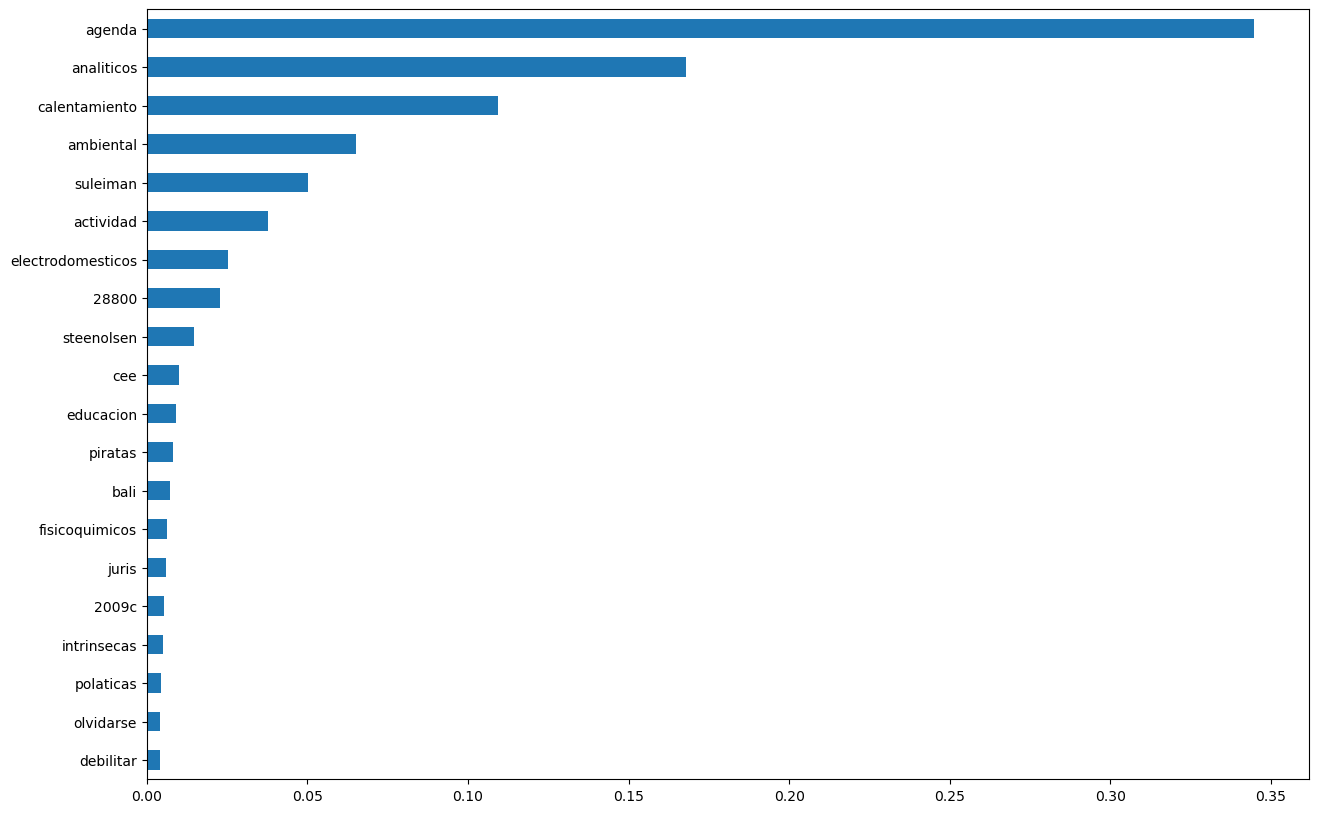

In [67]:
pd.Series(tfidf_model.feature_importances_, index=tfidf_vectorizer.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [68]:
# Calcular las profundidades de los árboles y almacenarlas en una lista
tree_depths = [tree[0].tree_.max_depth for tree in tfidf_model.estimators_]

# Calcular la profundidad promedio de los árboles
mean_tree_depth = np.mean(tree_depths)

print("Number of trees:", len(tfidf_model.estimators_))
print("Trees depth (mean):", mean_tree_depth)

Number of trees: 100
Trees depth (mean): 3.0


Se hace una predicción en los datos de entrenamiento y en los datos de prueba. El propósito de esto es evaluar el rendimiento del modelo y su capacidad para generalizar en datos nuevos.

In [69]:
# predicciones en función de las características de entrenamiento vectorizadas
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
# predicciones en función de las características de prueba vectorizadas en X_test["words"]
y_test_tfidf_predict = tfidf_model.predict(tfidf_vectorizer.transform(X_test["words"]))

## Validación cuantitativa

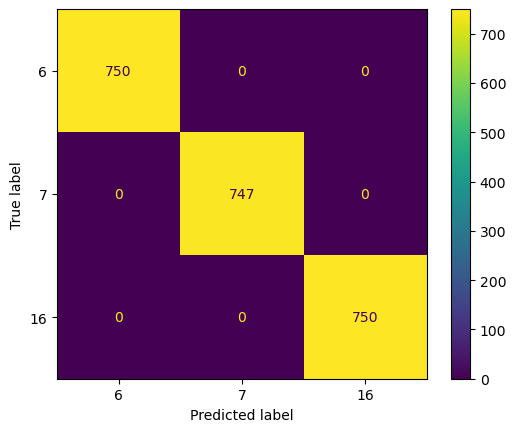

In [70]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

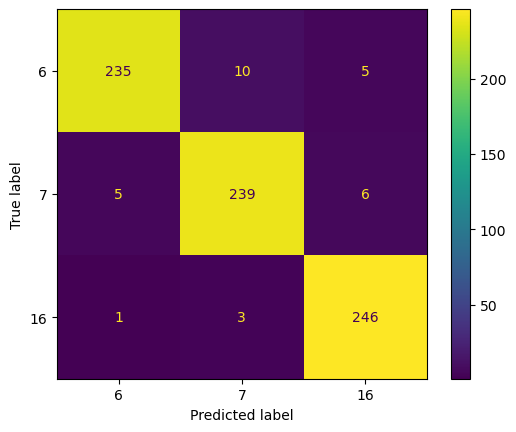

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

## Métricas para del data frame de entrenamiento

Estos resultados indican que el modelo de clasificación de Random Forest basado en TF-IDF logró clasificar correctamente todos los casos en el conjunto de entrenamiento. La precisión, recall y F1-score son todas iguales a 1. Esto implica que el modelo es muy preciso en predecir la clase correcta y no hay falsos positivos ni falsos negativos.

In [72]:
print("Precision (micro):", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_train, y_train_tfidf_predict, average='micro'))


Precision (micro): 1.0
Recall (micro): 1.0
F1 (micro): 1.0


In [73]:
print("Precision (macro):", precision_score(y_train, y_train_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_train, y_train_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_train, y_train_tfidf_predict, average='macro'))


Precision (macro): 1.0
Recall (macro): 1.0
F1 (macro): 1.0


In [74]:
print("Precision (weighted):", precision_score(y_train, y_train_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_train, y_train_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_train, y_train_tfidf_predict, average='weighted'))


Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


## Métricas para de data frame de prueba

Estos resultados corresponden a la evaluación del modelo de clasificación basado en TF-IDF en el conjunto de prueba. La precisión, recall y F1-score obtenidos son 0.96, 0.96 y 0.96, respectivamente. La precisión indica la proporción de verdaderos positivos entre los ejemplos clasificados como positivos, mientras que el recall mide la proporción de verdaderos positivos que han sido correctamente identificados por el modelo. El F1-score es una medida que combina la precisión y el recall para obtener una medida general de la calidad de la clasificación.

En este caso, los resultados indican que el modelo tiene una buena precisión y recall, lo que sugiere que es capaz de identificar correctamente la mayoría de los textos según ODS en el conjunto de prueba. Sin embargo, se evidencia una ligera disminución en estas métricas respecto al algoritmo Random Forest.

In [75]:
print("Precision (micro):", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision (micro): 0.96
Recall (micro): 0.96
F1 (micro): 0.96


In [76]:
print("Precision (macro):", precision_score(y_test, y_test_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_test, y_test_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_test, y_test_tfidf_predict, average='macro'))

Precision (macro): 0.9602382921440996
Recall (macro): 0.96
F1 (macro): 0.9599451929364614


In [77]:
print("Precision (weighted):", precision_score(y_test, y_test_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_test_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_test, y_test_tfidf_predict, average='weighted'))

Precision (weighted): 0.9602382921440997
Recall (weighted): 0.96
F1 (weighted): 0.9599451929364615


## Validación cruzada

El valor obtenido en la validación cruzada de 0.966 indica que el modelo de clasificación de texto usando TF-IDF como representación de características tiene un buen desempeño en términos de la precisión general en la predicción de las clases.

In [78]:
# Validación cruzada con 5 iteraciones (cv=5)
cv_scores = cross_val_score(tfidf_model, X_tfidf, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.96       0.96888889 0.9688196  0.9688196  0.96659243]
Mean cross-validation score: 0.9666241029448157


## 3.3. Árboles de decisión (Evelin Villamil, Carlos Monroy)

El algoritmo de árboles de decisión es un método de aprendizaje supervisado utilizado para clasificar datos en categorías o predecir valores numéricos. En este algoritmo, se construye un árbol de decisiones a partir de los datos de entrenamiento, donde cada nodo del árbol representa una característica del conjunto de datos y las ramas representan las posibles respuestas a esa característica. El árbol se construye de forma recursiva, dividiendo el conjunto de datos en subconjuntos más pequeños y homogéneos según ciertas características hasta alcanzar una determinada profundidad o un criterio de parada.

Este algoritmo puede resultar útil para entrenar modelos de clasificación de textos según ODS porque permite identificar las características más relevantes para hacer la clasificación, como las palabras más utilizadas. Al utilizar técnicas de procesamiento de texto como BoW, TF-IDF y HashingVectorizer, se pueden representar en un formato que pueda ser utilizado por el algoritmo de árboles de decisión. Por ejemplo, BoW representa los textos como vectores que indican la frecuencia de cada palabra en el conjunto de datos, mientras que TF-IDF le da más peso a las palabras menos comunes y HashingVectorizer representa los textos como vectores de valores binarios.

Al utilizar el algoritmo de árboles de decisión en conjunto con estas técnicas de procesamiento de texto, se puede lograr una clasificación más precisa y efectiva de los textos según ODS. Además, el algoritmo de árboles de decisión también permite visualizar el proceso de toma de decisiones del modelo, lo que puede ser útil para entender cómo se están haciendo las clasificaciones y mejorar el modelo en el futuro.

In [79]:
from sklearn.tree import DecisionTreeClassifier

## Entrenamiento del modelo con TF_IDF

## División de datos

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data_t[["words"]], data_t["sdg"], random_state=1, stratify=data_t['sdg'])

In [81]:
X_train.shape, X_test.shape

((2247, 1), (750, 1))

In [82]:
y_train.shape, y_test.shape

((2247,), (750,))

In [83]:
#ver los primeros datos de entrenamiento
y_train[:5]

1683     7
2414    16
1552     7
2597    16
1566     7
Name: sdg, dtype: int64

Se verifica que se mentenga una distribución de datos similar a la original:

In [84]:
pd.Series(y_train).value_counts(normalize=True)

16    0.333778
6     0.333778
7     0.332443
Name: sdg, dtype: float64

In [85]:
pd.Series(y_test).value_counts(normalize=True)

16    0.333333
7     0.333333
6     0.333333
Name: sdg, dtype: float64

## Vectorización del texto

En este código se está utilizando el TfidfVectorizer para crear una matriz de términos de frecuencia inversa de documentos (TF-IDF) a partir del conjunto de datos de entrenamiento (X_train). La finalidad de utilizar TF-IDF es dar más peso a las palabras que son importantes para el documento, lo que ayuda a mejorar la calidad de las predicciones.

In [86]:
texts = X_train['words']

# Crea una instancia de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,  
                                   stop_words= stop_words, 
                                   lowercase=True)

# Ajusta y transforma tus datos de texto
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# tfidf_matrix es una matriz que contiene las representaciones TF-IDF de tus textos

print(X_tfidf.shape)
print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))

C:\Users\Evelin Villamil\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(2247, 17941)
Vocabulary size: 17941


Utilizar el mismo valor para el parámetro random_state en diferentes modelos es una buena práctica para asegurar que los resultados sean reproducibles y comparables entre sí.

In [87]:
tfidf_model = DecisionTreeClassifier(random_state=3)

In [88]:
print("Shape de X_tfidf:", X_tfidf.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)
print("Ejemplos de y_train:", y_train[:10])  # Imprime las primeras 10 etiquetas
print("Ejemplos de y_test:", y_test[:10])    # Imprime las primeras 10 etiquetas

Shape de X_tfidf: (2247, 17941)
Shape de y_train: (2247,)
Shape de y_test: (750,)
Ejemplos de y_train: 1683     7
2414    16
1552     7
2597    16
1566     7
2991    16
1922     7
2282    16
220      6
672      6
Name: sdg, dtype: int64
Ejemplos de y_test: 2087    16
1494     7
2670    16
2261    16
1041     7
264      6
219      6
1827     7
1977     7
2406    16
Name: sdg, dtype: int64


In [89]:
tfidf_model.fit(X_tfidf, y_train)

DecisionTreeClassifier(random_state=3)

Luego, se está graficando un gráfico de barras horizontal para mostrar la importancia de cada característica en la predicción del modelo.

<Axes: >

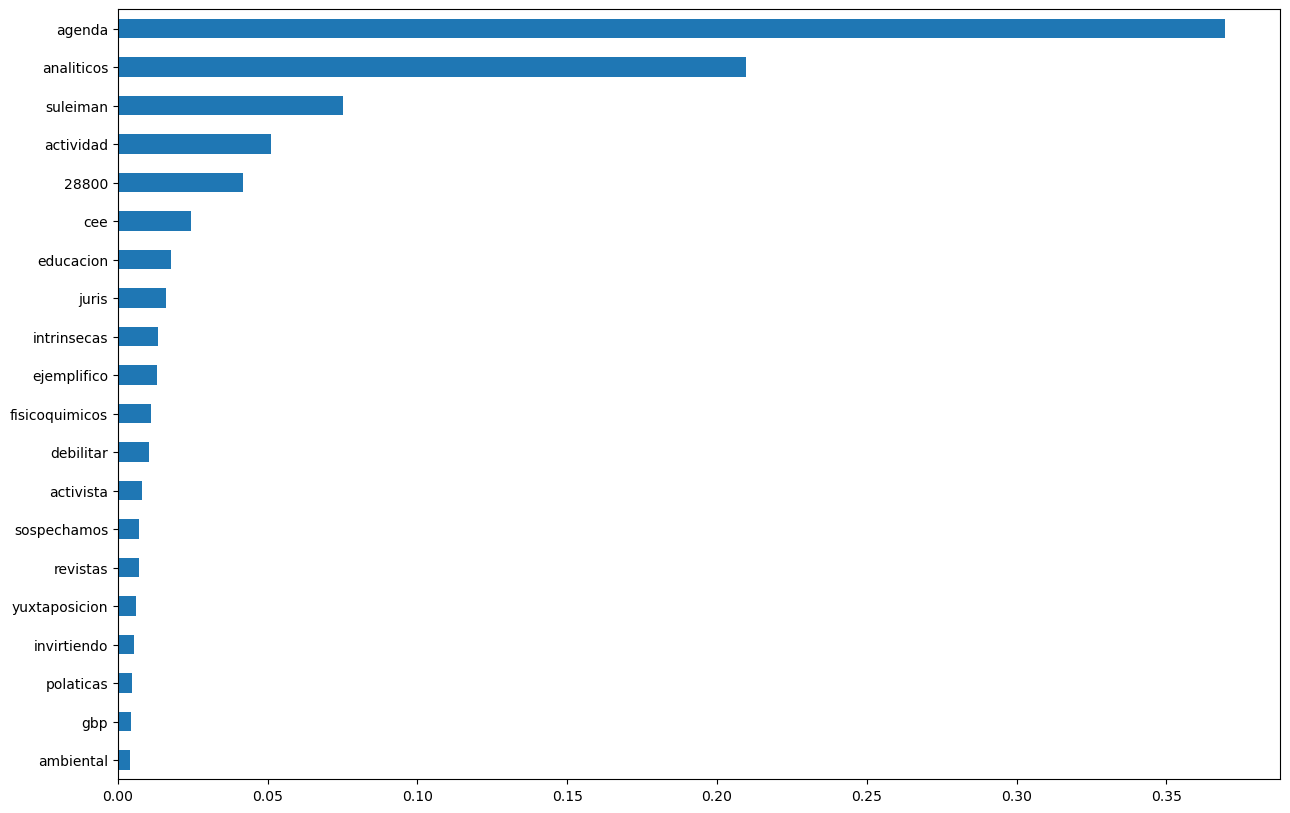

In [90]:
pd.Series(tfidf_model.feature_importances_, index=tfidf_vectorizer.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

A continuación, se muestra la cantidad de árboles en el modelo y la profundidad promedio de los árboles en el modelo. Finalmente, se hace una predicción en los datos de entrenamiento y en los datos de prueba. El propósito de esto es evaluar el rendimiento del modelo y su capacidad para generalizar en datos nuevos.

In [91]:
print('Number of trees:', 1)
print('Tree depth:', tfidf_model.get_depth())

Number of trees: 1
Tree depth: 41


In [92]:
# predicciones en función de las características de entrenamiento vectorizadas
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
# predicciones en función de las características de prueba vectorizadas en X_test["words"]
y_test_tfidf_predict = tfidf_model.predict(tfidf_vectorizer.transform(X_test["words"]))

## Validación cuantitativa

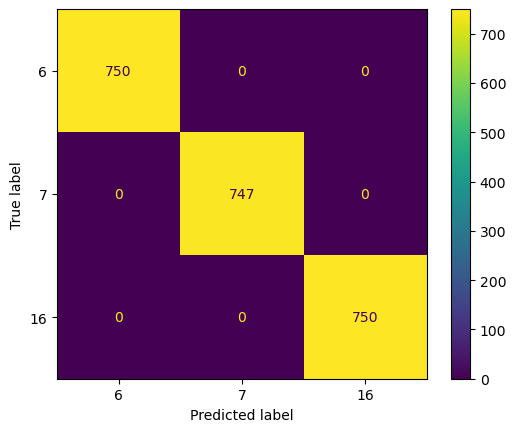

In [93]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

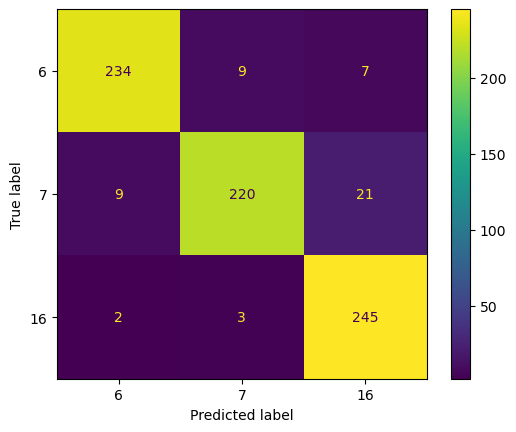

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

## Métricas para del data frame de entrenamiento

Estos resultados indican que el modelo de clasificación de Random Forest basado en TF-IDF logró clasificar correctamente todos los casos en el conjunto de entrenamiento. La precisión, recall y F1-score son todas iguales a 1. Esto implica que el modelo es muy preciso en predecir la clase correcta y no hay falsos positivos ni falsos negativos.

In [95]:
print("Precision (micro):", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_train, y_train_tfidf_predict, average='micro'))


Precision (micro): 1.0
Recall (micro): 1.0
F1 (micro): 1.0


In [96]:
print("Precision (macro):", precision_score(y_train, y_train_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_train, y_train_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_train, y_train_tfidf_predict, average='macro'))


Precision (macro): 1.0
Recall (macro): 1.0
F1 (macro): 1.0


In [97]:
print("Precision (weighted):", precision_score(y_train, y_train_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_train, y_train_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_train, y_train_tfidf_predict, average='weighted'))


Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


## Métricas para de data frame de prueba

Estos resultados corresponden a la evaluación del modelo de clasificación basado en TF-IDF en el conjunto de prueba. La precisión, recall y F1-score obtenidos son 0.93, 0.93 y 0.93, respectivamente. La precisión indica la proporción de verdaderos positivos entre los ejemplos clasificados como positivos, mientras que el recall mide la proporción de verdaderos positivos que han sido correctamente identificados por el modelo. El F1-score es una medida que combina la precisión y el recall para obtener una medida general de la calidad de la clasificación.

En este caso, los resultados indican que el modelo tiene una buena precisión y recall, lo que sugiere que es capaz de identificar correctamente la mayoría de los textos según ODS en el conjunto de prueba. Sin embargo, se evidencia una disminución en estas métricas respecto a los algoritmos Random Forest y Gradient Boosting Classifier.

In [98]:
print("Precision (micro):", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision (micro): 0.932
Recall (micro): 0.932
F1 (micro): 0.932


In [99]:
print("Precision (macro):", precision_score(y_test, y_test_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_test, y_test_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_test, y_test_tfidf_predict, average='macro'))

Precision (macro): 0.9336046001070631
Recall (macro): 0.932
F1 (macro): 0.9317400338845402


In [100]:
print("Precision (weighted):", precision_score(y_test, y_test_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_test_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_test, y_test_tfidf_predict, average='weighted'))

Precision (weighted): 0.9336046001070633
Recall (weighted): 0.932
F1 (weighted): 0.9317400338845401


## Validación cruzada

El valor obtenido en la validación cruzada de 0.936 indica que el modelo de clasificación de texto usando TF-IDF como representación de características tiene un buen desempeño en términos de la precisión general en la predicción de las clases.

In [101]:
# Validación cruzada con 5 iteraciones (cv=5)
cv_scores = cross_val_score(tfidf_model, X_tfidf, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.92888889 0.93777778 0.94654788 0.94654788 0.922049  ]
Mean cross-validation score: 0.936362286562732


# Conclusiones parciales

Para la técnica de procesamiento de texto utilizada (TF-IDF), se obtuvo los mejores resultados con el algoritmo RandomForrest. 

Random forest es un algoritmo de ensamblado de árboles de decisión que combina múltiples árboles de decisión individuales para mejorar la precisión y la generalización del modelo. En comparación con un árbol de decisión único, un bosque aleatorio crea múltiples árboles de decisión a partir de muestras aleatorias de los datos de entrenamiento y características aleatorias de esas muestras, lo que reduce la probabilidad de sobreajuste y mejora la generalización del modelo.

En el caso de la clasificación de textos según ODS, el uso de técnicas de procesamiento de texto como TF-IDF puede producir una gran cantidad de características (miles o incluso millones), lo que puede hacer que los árboles de decisión y Gradient Boosting tengan un alto riesgo de sobreajuste y una baja generalización. En cambio, Random forest puede manejar grandes cantidades de características y muestras, mientras mantiene un bajo riesgo de sobreajuste y una alta precisión en la clasificación de reseñas. Además, el algoritmo de Random forest es capaz de capturar relaciones no lineales entre características y etiquetas, lo que puede resultar en mejores resultados de clasificación en comparación con los árboles de decisión y Gradient Boosting.

Con base en lo mencionado anteriormente, el modelo TF-IDF obtuvo el valor más alto en recall y F1, lo que indica que este modelo es capaz de identificar correctamente más casos positivos que los otros dos modelos, sin sacrificar mucho la precisión. Por lo tanto, basándonos en las métricas de evaluación y la validación cruzada, se podría seleccionar el modelo TF-IDF como la mejor opción para clasificar los datos.

Además, al realizar la validación cruzada, se obtuvo un valor promedio de 0.9804167285325415, lo que indica que el modelo tiene un buen desempeño en la generalización a nuevos datos. Estas métricas indican que el modelo de clasificación con TF-IDF es una buena opción para resolver este problema en particular. Los resultados obtenidos con el modelo de clasificación basado en TF-IDF indican que el modelo tiene una buena capacidad para clasificar textos según los ODS. Esto puede ser de gran utilidad para un negocio que busca automatizar la relación de textos con categorías de ODS y realizar análisis automatizados de opiniones. Esto tiene el potencial de mejorar la eficiencia operativa y la toma de decisiones, lo que puede ser beneficioso tanto para el negocio como para la comunidad local.

Los resultados obtenidos con el modelo de clasificación basado en TF-IDF indican que podría ser una herramienta valiosa para un negocio que busca relacionar de manera automática un texto según los ODS y hacer un análisis automatizado de opiniones que representan la voz de los habitantes locales sobre problemáticas de su entorno particular.

Por lo tanto, se decide exportar este modelo para que pueda ser utilizado por la empresa sobre nuevos datos:

In [102]:
import joblib
joblib.dump(tfidf_model_best, 'best_model.joblib')

['best_model.joblib']

Carga del mejor modelo

In [103]:
modelo_cargado = joblib.load('best_model.joblib')

Aplicación del mejor modelo al conjunto de datos inicial:

In [110]:
X_train_2=X_train
X_test_2=X_test
y_train_2=y_train
y_test_2=y_test

In [111]:
parametros_2 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": True,
    "classifier__n_estimators": 300,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 100
}

In [112]:
pipeline_2 = Pipeline(steps=[
    ("vectorizer", parametros_2["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_2["classifier__n_estimators"],
        criterion=parametros_2["classifier__criterion"],
        max_depth=parametros_2["classifier__max_depth"],
        random_state=4
    ))
])

In [114]:
# Entrenamiento del modelo con los datos
pipeline_2.fit(X_train_2["words"], y_train_2)

C:\Users\Evelin Villamil\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x000002407216DC60>)),
                ('classifier',
                 RandomForestClassifier(max_depth=100, n_estimators=300,
                                        random_state=4))])

In [115]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_2 = pipeline_2.predict(X_train_2["words"])
y_test_predict_2 = pipeline_2.predict(X_test_2["words"])

In [116]:
print("Precision (weighted):", precision_score(y_train_2, y_train_predict_2, average='weighted'))
print("Recall (weighted):", recall_score(y_train_2, y_train_predict_2, average='weighted'))
print("F1 (weighted):", f1_score(y_train_2, y_train_predict_2, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


In [117]:
print("Precision (weighted):", precision_score(y_test_2, y_test_predict_2, average='weighted'))
print("Recall (weighted):", recall_score(y_test_2, y_test_predict_2, average='weighted'))
print("F1 (weighted):", f1_score(y_test_2, y_test_predict_2, average='weighted'))

Precision (weighted): 0.9812948722084565
Recall (weighted): 0.9813333333333333
F1 (weighted): 0.9812957651792282


## Generar predicciones

Se lee el archivo original

In [166]:
nuevo_df = pd.read_excel('./data/cat_6716.xlsx')

In [167]:
nuevo_df.shape

(3000, 2)

In [168]:
nuevo_df.sample(5)

,Textos_espanol,sdg
1236,Las importaciones de combustibles representaron el 6 por ciento del PIB y el 14 por ciento de las importaciones de mercancías en 2014. El sector del transporte y el sector de la electricidad son los mayores usuarios de combustibles fósiles (Figura 9.3). Se están mejorando las carreteras y Port Vila tiene un servicio de minibús único que sirve como el principal sistema de transporte público.,7
2925,"¿Cómo (si acaso) se puede equilibrar el derecho a la libertad de un niño en virtud del artículo 5 del Convenio Europeo de Derechos Humanos ('CEDH') con los derechos de los padres, consagrados tanto en el derecho consuetudinario como en el artículo 8 del CEDH? ¿Existe un límite en la medida en que los padres pueden, ellos mismos oa través de otros, tratar de imponer restricciones a la libertad de su hijo discapacitado para proteger los intereses de su hijo? Este caso considera las respuestas dadas a estas preguntas y las implicaciones de la decisión de la Corte Suprema en septiembre de 2019 en Re D (A Child) [2019] UKSC 42.",16
157,"El aumento previsto de la frecuencia e intensidad de los fenómenos meteorológicos extremos y de los caudales elevados causado por el cambio climático puede provocar la resuspensión de los contaminantes almacenados en los sedimentos. Se trata de un problema grave que provoca la pérdida de biodiversidad acuática en ríos, lagos y humedales, dificulta el uso humano del agua (por ejemplo, agua potable, actividades recreativas, pesca, natación) y también puede afectar a la salud humana (véase más adelante y el capítulo 4 sobre biodiversidad). La contaminación eutrofizante procede de fuentes puntuales (sistemas de aguas residuales urbanas) y difusas (principalmente escorrentía de tierras agrícolas). A continuación se analiza cada una de ellas.",6
2458,"Los bancos islámicos son bancos que llevan a cabo sus actividades comerciales sobre la base de principios hari a. En el momento de la crisis económica de 1998, muchos bancos convencionales colapsaron mientras que los bancos islámicos no se vieron afectados. Después de la crisis, la banca islámica experimentó un desarrollo significativo en Indonesia. ¿Cuál es la estrategia en la gestión de los bancos islámicos en Indonesia basada en la Ley Número 21 de 2008? El método utilizado en este estudio es la investigación jurídica normativa utilizando el enfoque estatutario. Los resultados de este estudio explican que de 2008 a 2018 no hubo bancos islámicos que experimentaran problemas legales, mientras que existían bancos convencionales, a saber, Century Bank e IFI Bank. Con base en el Artículo 34 de la Ley Número 21 de 2008 se afirma que los bancos islámicos deben implementar un buen gobierno que abarque los principios de transparencia, rendición de cuentas, responsabilidad, profesionalismo y equidad en la realización de sus actividades comerciales. Por lo tanto, la estrategia de gestión de los bancos islámicos en Indonesia aplica los principios del buen gobierno corporativo.",16
1246,"Destaca, en particular, que el impacto del efecto de compresión depende en gran medida del período de tiempo considerado. A corto plazo, cuando la estructura de los sistemas eléctricos es fija, especialmente los productores de costos variables altos, como el gas, disminuirán su participación de mercado como resultado de precios promedio más bajos. Sin embargo, a largo plazo, cuando se deben considerar nuevas inversiones, los factores de carga reducidos significan que los inversionistas tienen una tendencia a alejarse de las tecnologías intensivas en capital, de alto costo fijo y bajas en carbono, como la nuclear. entre factores de carga más bajos y precios de carbono más altos.",7


Se utiliza el modelo para predecir los valores de la nueva etiqueta OSD

In [169]:
nuevo_df['ODS'] = pipeline_2.predict(nuevo_df['Textos_espanol'])

In [170]:
nuevo_df['ODS'].describe()

count    3000.000000
mean        9.694333
std         4.514757
min         6.000000
25%         6.000000
50%         7.000000
75%        16.000000
max        16.000000
Name: ODS, dtype: float64

Se guardan los resultados en un nuevo archivo  csv

In [171]:
nuevo_df.to_csv("new_cat_6716.csv", index=False)

# Sustentación

## Histogramas

### - Distribución de la columna real (sdg)

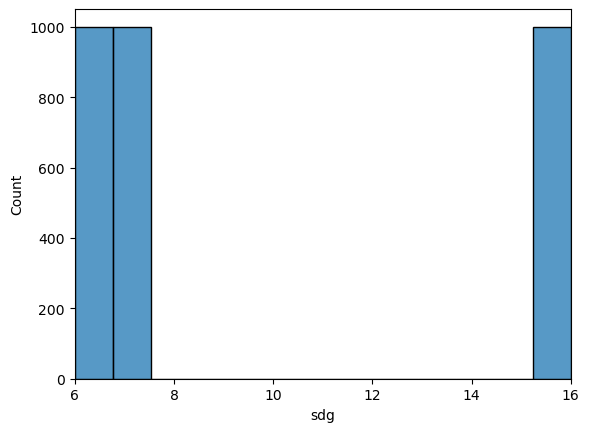

In [172]:
# Create a histogram plot of selling prices
import seaborn as sns

# Create a histogram plot of selling prices
sns.histplot(nuevo_df['sdg'])
plt.xlim(6, 16)
# Display the plot
plt.show()

### - Distribución de la columna de predicciones (ODS)

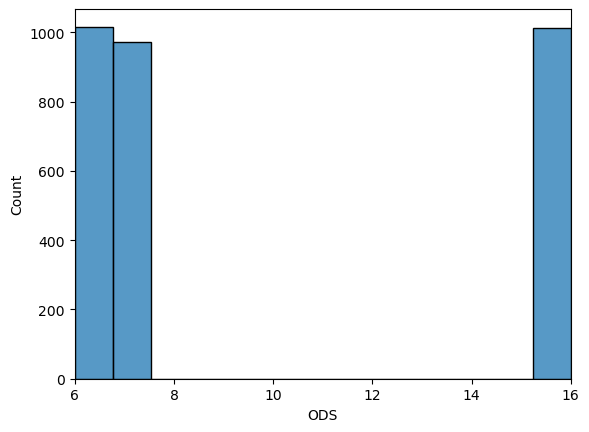

In [173]:
# Create a histogram plot of selling prices
sns.histplot(nuevo_df['ODS'])
plt.xlim(6, 16)
# Display the plot
plt.show()

In [174]:
nuevo_df.sample(5)

,Textos_espanol,sdg,ODS
1384,"El 81% de los encuestados menciona el petróleo como una de las fuentes de energía más utilizadas, el 77% el gas y el 36% la energía nuclear, seguido del carbón con un 35%. Su alto grado de conocimiento de la combinación energética puede explicar por lo tanto por qué los encuestados se centran en la volatilidad de los precios de los combustibles: en el caso del petróleo, por ejemplo, que es la fuente de energía más utilizada para la mayoría de los europeos, la señal transmitida por el precio de los el barril puede ser considerado como un indicador de la confianza de los consumidores en la seguridad del suministro energético de su país. Para explorar la posibilidad de correlación entre las preocupaciones sobre la seguridad del suministro de energía y las actitudes públicas hacia la energía nuclear que se han desarrollado en la primera parte de este capítulo, no es suficiente proporcionar una instantánea del estado de la opinión pública sobre estos temas.",7,7
165,"En primer lugar, las preocupaciones sobre el deterioro físico de los sistemas acuíferos incluyen cambios tanto en la cantidad como en la calidad del agua subterránea disponible (incluida la salinidad), así como el potencial de hundimiento irreversible de la tierra (p. ej., Konikow, 2013). En segundo lugar, las interacciones entre los sistemas de aguas subterráneas y superficiales también han sido un importante impulsor de los cambios en la política de aguas subterráneas. Por ejemplo, las preocupaciones sobre el agotamiento de los arroyos han llevado a la introducción de regulaciones sobre el uso de aguas subterráneas en varias cuencas fluviales transfronterizas en los Estados Unidos, incluido el río Pecos (entre Texas y Nuevo México), el río Arkansas (Kansas y Colorado) y el río Republican (Kansas, Nebraska y Colorado), así como en otros países como la cuenca del Guadalquivir en España. Los efectos adversos del agotamiento de la corriente en el hábitat de la corriente y las especies en peligro de extinción también han dado lugar a la adopción de medidas reglamentarias, por ejemplo, en varios estados de EE. UU.",6,6
1380,"Estos riesgos reales y percibidos suelen traducirse en una financiación más costosa que la disponible para fuentes de generación más tradicionales.9 Como señala el IPCC (2011), para funcionar eficazmente, los mercados dependen de una información oportuna, adecuada y veraz. Pero los mercados energéticos distan mucho de ser perfectos, y esto es especialmente cierto en el caso de los mercados en transición tecnológica y estructural, como el de las ER. Así, como resultado de una información insuficiente, el riesgo subyacente del proyecto puede tender a sobrevalorarse y los costes de transacción pueden aumentar en comparación con las tecnologías convencionales de combustibles fósiles. A menudo, la viabilidad de una inversión concreta depende de que se mantenga un determinado régimen político, y éste es un riesgo importante que los inversores de capital y deuda (bancos) tendrán que evaluar antes de decidir los parámetros de financiación del proyecto.",7,7
562,"Si bien es general, el marco debe adaptarse a las limitaciones locales específicas. Los siguientes párrafos proporcionan evidencia de apoyo para los principales elementos de gestión. En su revisión de las políticas de riego de aguas subterráneas, Garduno y Foster (2010) piden el diseño y uso de enfoques pragmáticos de cuatro niveles que combinen i) medidas administrativas (regulaciones y cargos), ii) participación de la comunidad y autorregulación, iii) suministro de financiamiento y intervenciones de demanda, y iv) macro-intervención para limitar la demanda de agua subterránea (políticas agrícolas, subsidios a la energía).",6,6
942,"Otra directiva derivada de la DMA se centra en las aguas subterrÃ¡neas.5 La Directiva sobre las aguas de baÃ±o6 tiene por objeto proteger la salud de los usuarios de las aguas de baÃ±o interiores y costeras de Europa. La Directiva sobre la ges

A partir del nuevo Data Frame se calcula el f1-score de nuestro modelo, dando como resultado 0.986. Esto indica que el modelo tiene un rendimiento sobresaliente en la tarea de clasificación y es muy preciso y exhaustivo en su capacidad para predecir las clases de interés.

In [175]:
from sklearn.metrics import f1_score

y_pred = nuevo_df['sdg']
y_true = nuevo_df['ODS']

# Calcular el F1 score
f1 = f1_score(y_true, y_pred, average='micro')
print("F1 Score:", f1)


F1 Score: 0.986
